In [19]:
# ============================================
# Cell 1: 라이브러리 및 데이터 로드
# ============================================
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_theme(style="whitegrid")

# 데이터 로드
DATA_PATH = Path("../data/samples.json")
with DATA_PATH.open(encoding="utf-8") as f:
    samples = json.load(f)

df = pd.DataFrame(samples)

# stats 컬럼에서 개별 컬럼 추출
df["text_length"] = df["text"].apply(len)
df["n_sentences"] = df["stats"].apply(lambda x: x["n_sentences"])
df["n_chars"] = df["stats"].apply(lambda x: x["n_chars"])

print(f"✅ 총 샘플 수: {len(df)}")
df.head()

✅ 총 샘플 수: 48


,id,source,task,text,context,question,answer,stats,text_length,n_sentences,n_chars
0,KLUE-MRC-2848,KLUE-MRC,mrc,"한독(대표이사 김영진, 백진기)과 대한약학회(회장 이용복)가 공동 제정한 제51회 ...","한독(대표이사 김영진, 백진기)과 대한약학회(회장 이용복)가 공동 제정한 제51회 ...",서영준 교수가 인정받게 된 배경이 되는 논문은 몇 년도에 공개되었는가?,1996,"{'n_sentences': 7, 'n_chars': 695}",695,7,695
1,KLUE-MRC-3358,KLUE-MRC,mrc,성 접대 의혹에 연루된 것으로 알려진 김학의 전 법무부 차관의 출국금지 신청이 기각...,성 접대 의혹에 연루된 것으로 알려진 김학의 전 법무부 차관의 출국금지 신청이 기각...,김학의가 현재 근무하는 정부 부처는?,법무부,"{'n_sentences': 10, 'n_chars': 703}",703,10,703
2,SQuAD-8675,SQuAD,mrc,Whitehead did not begin his career as a philos...,Whitehead did not begin his career as a philos...,What did Whitehead consider himself as a philo...,rank amateur,"{'n_sentences': 4, 'n_chars': 681}",681,4,681
3,KLUE-MRC-3070,KLUE-MRC,mrc,세계보건기구(WHO)가 8일 서아프리카에서 확산 중인 에볼라 바이러스를 막기 위해 ...,세계보건기구(WHO)가 8일 서아프리카에서 확산 중인 에볼라 바이러스를 막기 위해 ...,"2009년, WHO가 최초로 비상사태를 선포한 이유가 된 바이러스는?",신종플루,"{'n_sentences': 7, 'n_chars': 559}",559,7,559
4,KLUE-MRC-5094,KLUE-MRC,mrc,엔카닷컴(대표 김상범)은 내차팔기 서비스 ‘엔카 비교견적’에 ‘실시간 견적’을 도입...,엔카닷컴(대표 김상범)은 내차팔기 서비스 ‘엔카 비교견적’에 ‘실시간 견적’을 도입...,엔카 닷컴의 조사에서 선호하는 차 판매 방식 1위를 차지한 것은?,‘중고차 거래 앱/사이트’,"{'n_sentences': 9, 'n_chars': 600}",600,9,600


In [20]:
# ============================================
# Cell 2: 전처리 품질 기준 정의 및 검증
# ============================================
# 품질 기준 (fetch_data.py와 동일)
QUALITY_CRITERIA = {
    "MIN_CHARS": 200,
    "MAX_CHARS": 1800,
    "MIN_SENTENCES": 3,
}

# 기준 충족 여부 확인
df["meets_min_chars"] = df["text_length"] >= QUALITY_CRITERIA["MIN_CHARS"]
df["meets_max_chars"] = df["text_length"] <= QUALITY_CRITERIA["MAX_CHARS"]
df["meets_min_sentences"] = df["n_sentences"] >= QUALITY_CRITERIA["MIN_SENTENCES"]
df["meets_all_criteria"] = df["meets_min_chars"] & df["meets_max_chars"] & df["meets_min_sentences"]

# 결과 출력
print("=" * 50)
print("📋 데이터 품질 기준 충족 현황")
print("=" * 50)
print(f"✅ 최소 글자 수 ({QUALITY_CRITERIA['MIN_CHARS']}자 이상): {df['meets_min_chars'].sum()}/{len(df)} ({df['meets_min_chars'].mean()*100:.1f}%)")
print(f"✅ 최대 글자 수 ({QUALITY_CRITERIA['MAX_CHARS']}자 이하): {df['meets_max_chars'].sum()}/{len(df)} ({df['meets_max_chars'].mean()*100:.1f}%)")
print(f"✅ 최소 문장 수 ({QUALITY_CRITERIA['MIN_SENTENCES']}문장 이상): {df['meets_min_sentences'].sum()}/{len(df)} ({df['meets_min_sentences'].mean()*100:.1f}%)")
print("-" * 50)
print(f"✅ 모든 기준 충족: {df['meets_all_criteria'].sum()}/{len(df)} ({df['meets_all_criteria'].mean()*100:.1f}%)")

📋 데이터 품질 기준 충족 현황
✅ 최소 글자 수 (200자 이상): 48/48 (100.0%)
✅ 최대 글자 수 (1800자 이하): 48/48 (100.0%)
✅ 최소 문장 수 (3문장 이상): 48/48 (100.0%)
--------------------------------------------------
✅ 모든 기준 충족: 48/48 (100.0%)


/var/folders/w6/0r_0gb1s6pq8t8dzylbs6qcc0000gn/T/ipykernel_28225/1551578149.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_counts.index, y=source_counts.values, palette=colors, ax=axes[1])
/var/folders/w6/0r_0gb1s6pq8t8dzylbs6qcc0000gn/T/ipykernel_28225/1551578149.py:21: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/w6/0r_0gb1s6pq8t8dzylbs6qcc0000gn/T/ipykernel_28225/1551578149.py:21: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/w6/0r_0gb1s6pq8t8dzylbs6qcc0000gn/T/ipykernel_28225/1551578149.py:21: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/w6/0r_0gb1s6pq8t8dzylbs6qcc0000gn/T/ipykernel_28225/1551578149.py:21: UserWarning: Gl

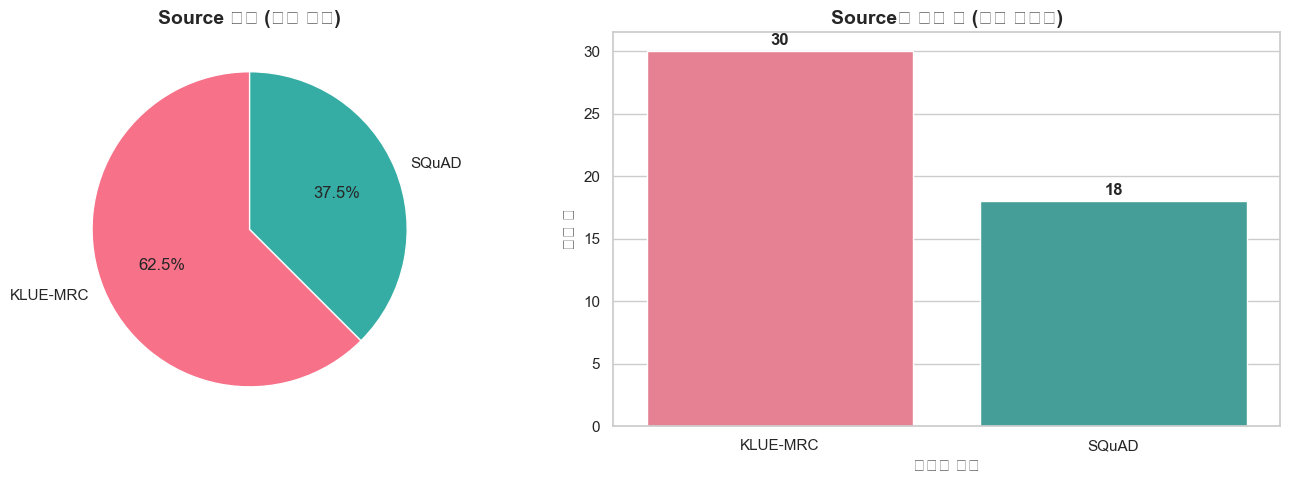


📊 Source별 샘플 수:
source
KLUE-MRC    30
SQuAD       18


In [21]:
# ============================================
# Cell 3: Source별 분포 분석 (파이 차트 + 막대 그래프)
# ============================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 파이 차트
source_counts = df["source"].value_counts()
colors = sns.color_palette("husl", len(source_counts))
axes[0].pie(source_counts.values, labels=source_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90)
axes[0].set_title("Source 분포 (파이 차트)", fontsize=14, fontweight='bold')

# 막대 그래프
sns.barplot(x=source_counts.index, y=source_counts.values, palette=colors, ax=axes[1])
axes[1].set_xlabel("데이터 출처", fontsize=12)
axes[1].set_ylabel("샘플 수", fontsize=12)
axes[1].set_title("Source별 샘플 수 (막대 그래프)", fontsize=14, fontweight='bold')
for i, v in enumerate(source_counts.values):
    axes[1].text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig("../data/source_distribution.png", dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 Source별 샘플 수:")
print(source_counts.to_string())

/var/folders/w6/0r_0gb1s6pq8t8dzylbs6qcc0000gn/T/ipykernel_28225/512980996.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="source", y="text_length", palette="husl", ax=axes[1])
/var/folders/w6/0r_0gb1s6pq8t8dzylbs6qcc0000gn/T/ipykernel_28225/512980996.py:23: UserWarning: Glyph 53581 (\N{HANGUL SYLLABLE TEG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/w6/0r_0gb1s6pq8t8dzylbs6qcc0000gn/T/ipykernel_28225/512980996.py:23: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/w6/0r_0gb1s6pq8t8dzylbs6qcc0000gn/T/ipykernel_28225/512980996.py:23: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/w6/0r_0gb1s6pq8t8dzylbs6qcc0000gn/T/ipykernel_28225/512980996.py:23: UserWarning: Glyph 44600 (\

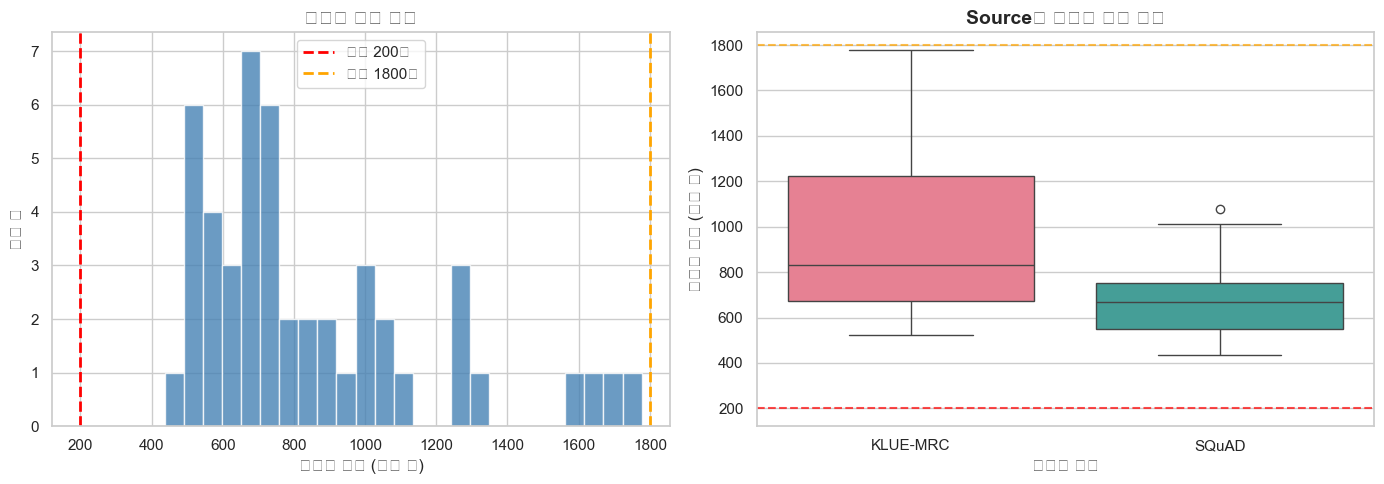


📈 텍스트 길이 통계:
count      48.0
mean      854.5
std       337.5
min       437.0
25%       616.5
50%       742.5
75%      1010.2
max      1777.0


In [14]:
# ============================================
# Cell 4: 텍스트 길이 분포 (히스토그램 + 박스플롯)
# ============================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 히스토그램 with 기준선
axes[0].hist(df["text_length"], bins=25, color='steelblue', edgecolor='white', alpha=0.8)
axes[0].axvline(QUALITY_CRITERIA["MIN_CHARS"], color='red', linestyle='--', linewidth=2, label=f'최소 {QUALITY_CRITERIA["MIN_CHARS"]}자')
axes[0].axvline(QUALITY_CRITERIA["MAX_CHARS"], color='orange', linestyle='--', linewidth=2, label=f'최대 {QUALITY_CRITERIA["MAX_CHARS"]}자')
axes[0].set_xlabel("텍스트 길이 (글자 수)", fontsize=12)
axes[0].set_ylabel("샘플 수", fontsize=12)
axes[0].set_title("텍스트 길이 분포", fontsize=14, fontweight='bold')
axes[0].legend()

# Source별 박스플롯
sns.boxplot(data=df, x="source", y="text_length", palette="husl", ax=axes[1])
axes[1].axhline(QUALITY_CRITERIA["MIN_CHARS"], color='red', linestyle='--', linewidth=1.5, alpha=0.7)
axes[1].axhline(QUALITY_CRITERIA["MAX_CHARS"], color='orange', linestyle='--', linewidth=1.5, alpha=0.7)
axes[1].set_xlabel("데이터 출처", fontsize=12)
axes[1].set_ylabel("텍스트 길이 (글자 수)", fontsize=12)
axes[1].set_title("Source별 텍스트 길이 분포", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig("../data/text_length_distribution.png", dpi=150, bbox_inches='tight')
plt.show()

# 통계 요약
print("\n📈 텍스트 길이 통계:")
print(df["text_length"].describe().round(1).to_string())

/var/folders/w6/0r_0gb1s6pq8t8dzylbs6qcc0000gn/T/ipykernel_28225/3268856481.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="source", y="n_sentences", palette="husl", ax=axes[1])
/var/folders/w6/0r_0gb1s6pq8t8dzylbs6qcc0000gn/T/ipykernel_28225/3268856481.py:21: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/w6/0r_0gb1s6pq8t8dzylbs6qcc0000gn/T/ipykernel_28225/3268856481.py:21: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/w6/0r_0gb1s6pq8t8dzylbs6qcc0000gn/T/ipykernel_28225/3268856481.py:21: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/w6/0r_0gb1s6pq8t8dzylbs6qcc0000gn/T/ipykernel_28225/3268856481.py:21: UserWarning: Glyph 493

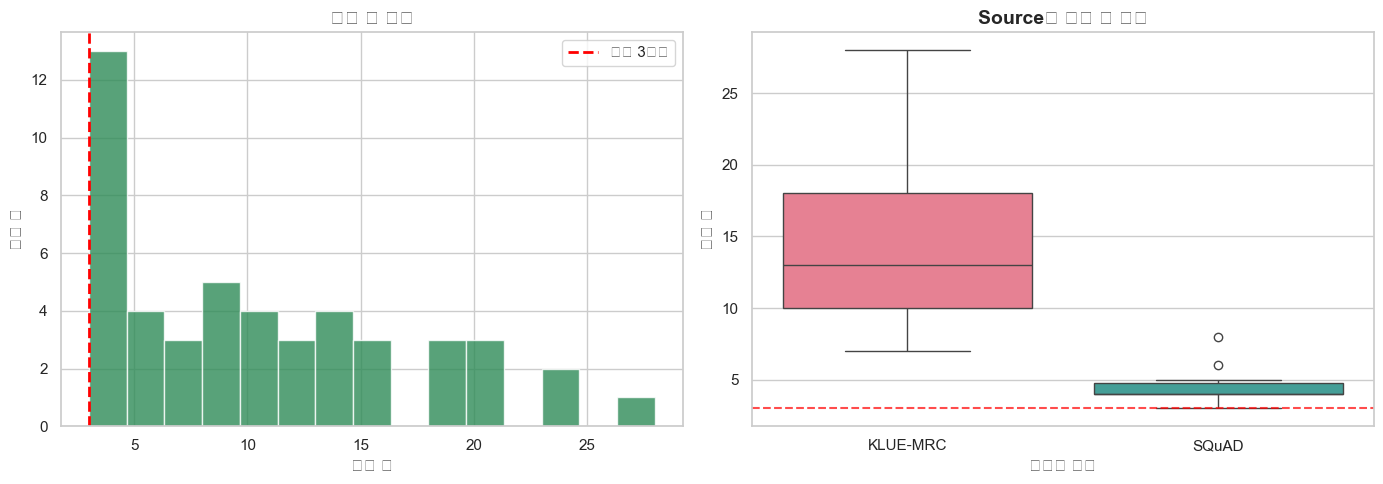


📈 문장 수 통계:
count    48.0
mean     10.5
std       6.6
min       3.0
25%       4.0
50%       8.5
75%      14.5
max      28.0


In [15]:
# ============================================
# Cell 5: 문장 수 분포 분석
# ============================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 히스토그램
axes[0].hist(df["n_sentences"], bins=15, color='seagreen', edgecolor='white', alpha=0.8)
axes[0].axvline(QUALITY_CRITERIA["MIN_SENTENCES"], color='red', linestyle='--', linewidth=2, label=f'최소 {QUALITY_CRITERIA["MIN_SENTENCES"]}문장')
axes[0].set_xlabel("문장 수", fontsize=12)
axes[0].set_ylabel("샘플 수", fontsize=12)
axes[0].set_title("문장 수 분포", fontsize=14, fontweight='bold')
axes[0].legend()

# Source별 박스플롯
sns.boxplot(data=df, x="source", y="n_sentences", palette="husl", ax=axes[1])
axes[1].axhline(QUALITY_CRITERIA["MIN_SENTENCES"], color='red', linestyle='--', linewidth=1.5, alpha=0.7)
axes[1].set_xlabel("데이터 출처", fontsize=12)
axes[1].set_ylabel("문장 수", fontsize=12)
axes[1].set_title("Source별 문장 수 분포", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig("../data/sentence_count_distribution.png", dpi=150, bbox_inches='tight')
plt.show()

print("\n📈 문장 수 통계:")
print(df["n_sentences"].describe().round(1).to_string())

In [16]:
# ============================================
# Cell 6: 이상치(Outlier) 탐지
# ============================================
def detect_outliers_iqr(series, name):
    """IQR 방법으로 이상치 탐지"""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = series[(series < lower) | (series > upper)]
    print(f"📍 {name}: Q1={Q1:.0f}, Q3={Q3:.0f}, IQR={IQR:.0f}")
    print(f"   정상 범위: [{lower:.0f}, {upper:.0f}]")
    print(f"   이상치 개수: {len(outliers)}개 ({len(outliers)/len(series)*100:.1f}%)")
    return outliers

print("=" * 50)
print("🔍 이상치(Outlier) 분석 (IQR 방법)")
print("=" * 50)
text_outliers = detect_outliers_iqr(df["text_length"], "텍스트 길이")
print()
sentence_outliers = detect_outliers_iqr(df["n_sentences"], "문장 수")

# 이상치 샘플 확인
if len(text_outliers) > 0:
    print("\n⚠️ 텍스트 길이 이상치 샘플:")
    print(df[df["text_length"].isin(text_outliers.values)][["id", "source", "text_length"]].to_string())

🔍 이상치(Outlier) 분석 (IQR 방법)
📍 텍스트 길이: Q1=616, Q3=1010, IQR=394
   정상 범위: [26, 1601]
   이상치 개수: 3개 (6.2%)

📍 문장 수: Q1=4, Q3=14, IQR=10
   정상 범위: [-12, 30]
   이상치 개수: 0개 (0.0%)

⚠️ 텍스트 길이 이상치 샘플:
                id    source  text_length
10  KLUE-MRC-11029  KLUE-MRC         1620
22    KLUE-MRC-212  KLUE-MRC         1723
36   KLUE-MRC-7055  KLUE-MRC         1777


In [17]:
# ============================================
# Cell 7: 종합 품질 리포트 생성
# ============================================
def generate_quality_report(df, criteria):
    """데이터 품질 종합 리포트 생성"""
    report = {
        "dataset_summary": {
            "total_samples": len(df),
            "sources": df["source"].value_counts().to_dict(),
            "tasks": df["task"].value_counts().to_dict() if "task" in df.columns else {},
        },
        "text_length_stats": {
            "mean": round(df["text_length"].mean(), 1),
            "median": round(df["text_length"].median(), 1),
            "std": round(df["text_length"].std(), 1),
            "min": int(df["text_length"].min()),
            "max": int(df["text_length"].max()),
        },
        "sentence_stats": {
            "mean": round(df["n_sentences"].mean(), 1),
            "median": round(df["n_sentences"].median(), 1),
            "std": round(df["n_sentences"].std(), 1),
            "min": int(df["n_sentences"].min()),
            "max": int(df["n_sentences"].max()),
        },
        "quality_criteria": criteria,
        "criteria_compliance": {
            "min_chars_met": int(df["meets_min_chars"].sum()),
            "max_chars_met": int(df["meets_max_chars"].sum()),
            "min_sentences_met": int(df["meets_min_sentences"].sum()),
            "all_criteria_met": int(df["meets_all_criteria"].sum()),
            "compliance_rate": round(df["meets_all_criteria"].mean() * 100, 1),
        },
    }
    return report

report = generate_quality_report(df, QUALITY_CRITERIA)

# JSON 파일로 저장
report_path = Path("../data/quality_report.json")
with report_path.open("w", encoding="utf-8") as f:
    json.dump(report, f, ensure_ascii=False, indent=2)

print("=" * 60)
print("📊 데이터 전처리 품질 리포트")
print("=" * 60)
print(f"\n📁 데이터셋 요약")
print(f"   - 총 샘플 수: {report['dataset_summary']['total_samples']}")
print(f"   - Source 분포: {report['dataset_summary']['sources']}")

print(f"\n📏 텍스트 길이 통계")
stats = report['text_length_stats']
print(f"   - 평균: {stats['mean']}자 | 중앙값: {stats['median']}자 | 표준편차: {stats['std']}")
print(f"   - 범위: {stats['min']}자 ~ {stats['max']}자")

print(f"\n📝 문장 수 통계")
stats = report['sentence_stats']
print(f"   - 평균: {stats['mean']}문장 | 중앙값: {stats['median']}문장 | 표준편차: {stats['std']}")
print(f"   - 범위: {stats['min']}문장 ~ {stats['max']}문장")

print(f"\n✅ 품질 기준 충족률")
comp = report['criteria_compliance']
print(f"   - 전체 충족률: {comp['compliance_rate']}%")
print(f"   - 리포트 저장 위치: {report_path}")

📊 데이터 전처리 품질 리포트

📁 데이터셋 요약
   - 총 샘플 수: 48
   - Source 분포: {'KLUE-MRC': 30, 'SQuAD': 18}

📏 텍스트 길이 통계
   - 평균: 854.5자 | 중앙값: 742.5자 | 표준편차: 337.5
   - 범위: 437자 ~ 1777자

📝 문장 수 통계
   - 평균: 10.5문장 | 중앙값: 8.5문장 | 표준편차: 6.6
   - 범위: 3문장 ~ 28문장

✅ 품질 기준 충족률
   - 전체 충족률: 100.0%
   - 리포트 저장 위치: ../data/quality_report.json


/var/folders/w6/0r_0gb1s6pq8t8dzylbs6qcc0000gn/T/ipykernel_28225/1830699905.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="source", y="text_length", palette="husl", ax=ax4)
/var/folders/w6/0r_0gb1s6pq8t8dzylbs6qcc0000gn/T/ipykernel_28225/1830699905.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="source", y="n_sentences", palette="husl", ax=ax5)
/var/folders/w6/0r_0gb1s6pq8t8dzylbs6qcc0000gn/T/ipykernel_28225/1830699905.py:64: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/w6/0r_0gb1s6pq8t8dzylbs6qcc0000gn/T/ipykernel_28225/1830699905.py:64: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) 

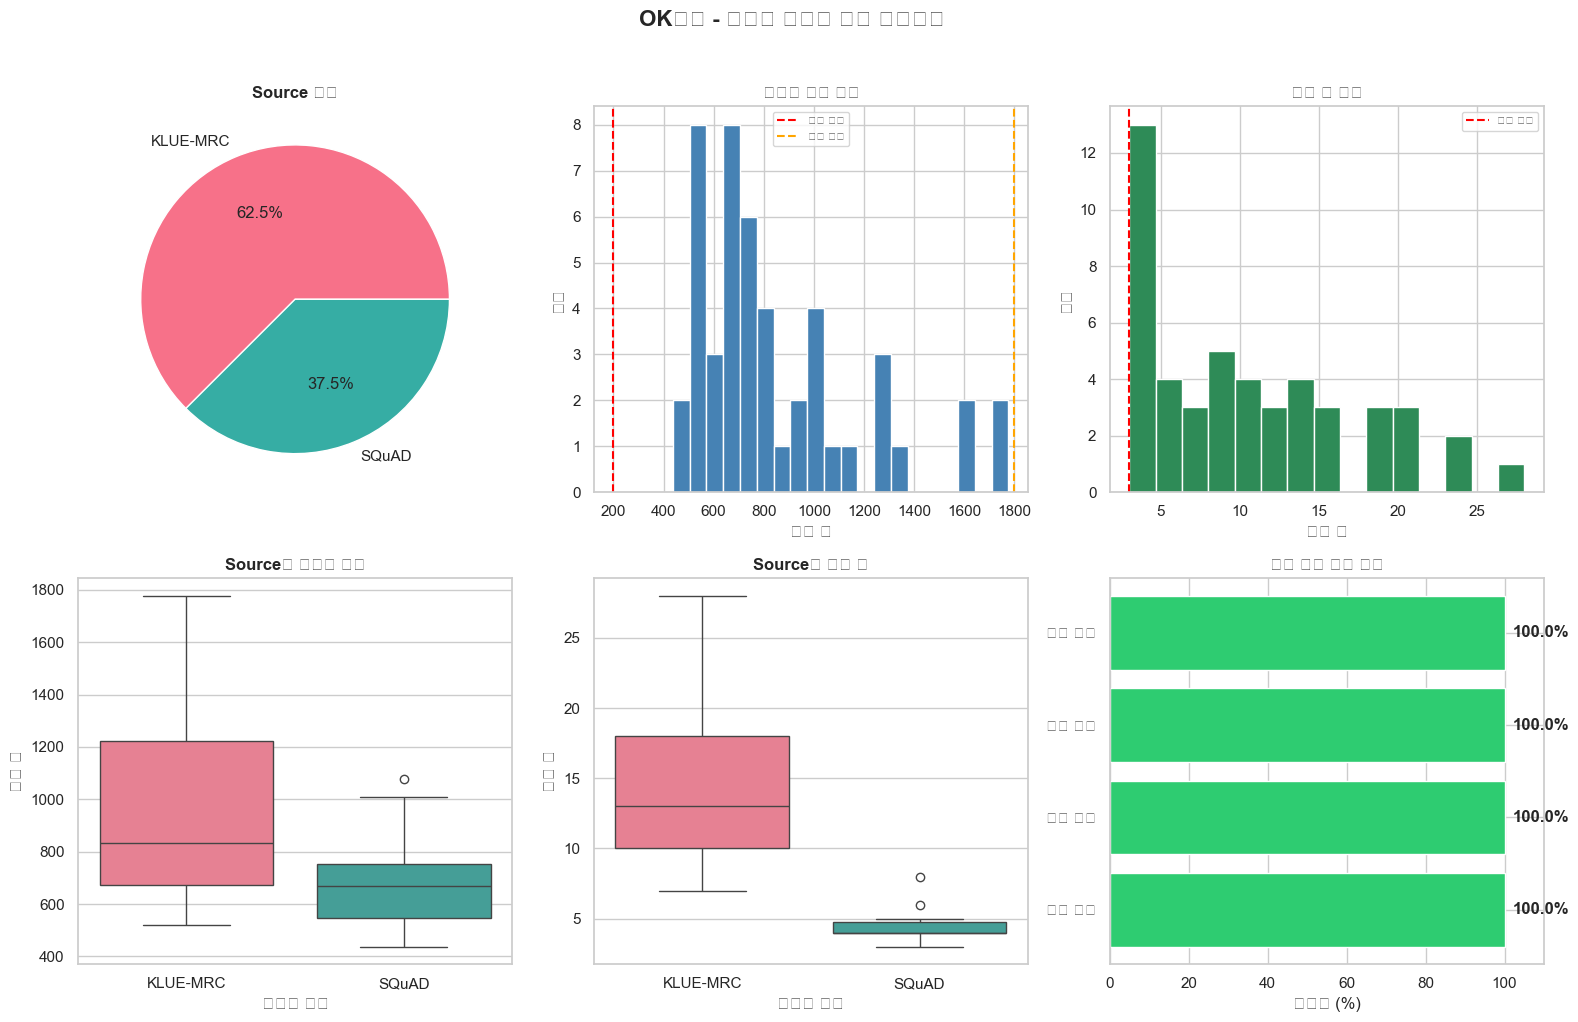


✅ 대시보드 이미지 저장 완료: ../data/quality_dashboard.png


In [18]:
# ============================================
# Cell 8: 최종 요약 시각화 (대시보드 스타일)
# ============================================
fig = plt.figure(figsize=(16, 10))

# 1. Source 분포 (왼쪽 상단)
ax1 = fig.add_subplot(2, 3, 1)
source_counts = df["source"].value_counts()
ax1.pie(source_counts.values, labels=source_counts.index, autopct='%1.1f%%', 
        colors=sns.color_palette("husl", len(source_counts)))
ax1.set_title("Source 분포", fontsize=12, fontweight='bold')

# 2. 텍스트 길이 히스토그램 (중앙 상단)
ax2 = fig.add_subplot(2, 3, 2)
ax2.hist(df["text_length"], bins=20, color='steelblue', edgecolor='white')
ax2.axvline(QUALITY_CRITERIA["MIN_CHARS"], color='red', linestyle='--', label='최소 기준')
ax2.axvline(QUALITY_CRITERIA["MAX_CHARS"], color='orange', linestyle='--', label='최대 기준')
ax2.set_xlabel("글자 수")
ax2.set_ylabel("빈도")
ax2.set_title("텍스트 길이 분포", fontsize=12, fontweight='bold')
ax2.legend(fontsize=8)

# 3. 문장 수 히스토그램 (오른쪽 상단)
ax3 = fig.add_subplot(2, 3, 3)
ax3.hist(df["n_sentences"], bins=15, color='seagreen', edgecolor='white')
ax3.axvline(QUALITY_CRITERIA["MIN_SENTENCES"], color='red', linestyle='--', label='최소 기준')
ax3.set_xlabel("문장 수")
ax3.set_ylabel("빈도")
ax3.set_title("문장 수 분포", fontsize=12, fontweight='bold')
ax3.legend(fontsize=8)

# 4. Source별 텍스트 길이 박스플롯 (왼쪽 하단)
ax4 = fig.add_subplot(2, 3, 4)
sns.boxplot(data=df, x="source", y="text_length", palette="husl", ax=ax4)
ax4.set_xlabel("데이터 출처")
ax4.set_ylabel("글자 수")
ax4.set_title("Source별 텍스트 길이", fontsize=12, fontweight='bold')

# 5. Source별 문장 수 박스플롯 (중앙 하단)
ax5 = fig.add_subplot(2, 3, 5)
sns.boxplot(data=df, x="source", y="n_sentences", palette="husl", ax=ax5)
ax5.set_xlabel("데이터 출처")
ax5.set_ylabel("문장 수")
ax5.set_title("Source별 문장 수", fontsize=12, fontweight='bold')

# 6. 품질 기준 충족 현황 (오른쪽 하단)
ax6 = fig.add_subplot(2, 3, 6)
criteria_labels = ['최소 글자', '최대 글자', '최소 문장', '전체 충족']
criteria_values = [
    df['meets_min_chars'].mean() * 100,
    df['meets_max_chars'].mean() * 100,
    df['meets_min_sentences'].mean() * 100,
    df['meets_all_criteria'].mean() * 100
]
colors = ['#2ecc71' if v == 100 else '#f39c12' if v >= 90 else '#e74c3c' for v in criteria_values]
bars = ax6.barh(criteria_labels, criteria_values, color=colors)
ax6.set_xlim(0, 110)
ax6.set_xlabel("충족률 (%)")
ax6.set_title("품질 기준 충족 현황", fontsize=12, fontweight='bold')
for bar, val in zip(bars, criteria_values):
    ax6.text(val + 2, bar.get_y() + bar.get_height()/2, f'{val:.1f}%', va='center', fontweight='bold')

plt.suptitle("OK독해 - 데이터 전처리 품질 대시보드", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig("../data/quality_dashboard.png", dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ 대시보드 이미지 저장 완료: ../data/quality_dashboard.png")